In [18]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [19]:
DATA_DIR = 'pizza types'
CLASSES = ['cheese', 'pepperoni', 'sausage', 'hawaiian', 'margherita']
CLASS_MAP = {CLASSES[i] : i for i in range(len(CLASSES)) }

In [20]:
image_paths = []

for dirpath, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        # Check for both upper and lower case file extensions
        if not filename.lower().endswith('.jpg'):
            old_image_path = os.path.join(dirpath, filename)
            image = cv2.imread(old_image_path)
            
            if image is None:
                print(f"Error loading image for jpg conversion: {image_path}")
                continue

            new_image_path = os.path.splitext(old_image_path)[0] + '.jpg'
            cv2.imwrite(new_image_path, image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

            os.remove(old_image_path)

            image_paths.append(new_image_path)
        else:
            image_path = os.path.join(dirpath, filename)
            image_paths.append(image_path)

Error loading image for jpg conversion: pizza types\margherita\4b103962dcf319961773341569945038fb384b01.jpg


In [21]:
# Resizing each image
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image for resizing: {image_path}")
        continue
    resized_image = cv2.resize(image, (256, 256))
    cv2.imwrite(image_path, resized_image)

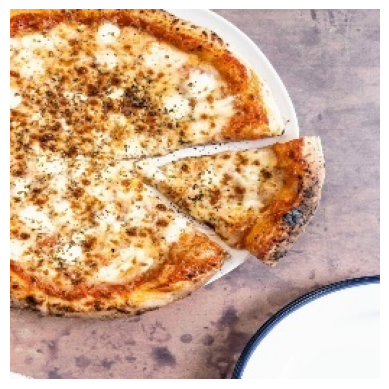

In [22]:
img = cv2.imread(image_paths[2])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [23]:
for pizza_type in os.listdir(DATA_DIR):
    pizza_folder = os.path.join(DATA_DIR, pizza_type)

    for filename in os.listdir(pizza_folder):
        image_path = os.path.join(pizza_folder, filename)

        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Error loading image for augmentation: {image_path}")
            continue
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_rgb = np.expand_dims(img_rgb, axis=0)

        datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        augmented_images = []
        for j in range(10):
            augmented_image_rgb = datagen.flow(img_rgb, batch_size=1).next()[0]
            augmented_images.append(augmented_image_rgb)

            augmented_filename = f"augmented_{filename[:-4]}_{j}.jpg"
            augmented_file_path = os.path.join(pizza_folder, augmented_filename)
            cv2.imwrite(augmented_file_path, cv2.cvtColor(augmented_image_rgb, cv2.COLOR_BGR2RGB), [int(cv2.IMWRITE_JPEG_QUALITY), 100])


Error loading image for augmentation: pizza types\margherita\4da0046a711198d0af0fd9066e3b32d348de0d93.png


In [24]:
X = []
y = []

for pizza_type in os.listdir(DATA_DIR):
    pizza_folder_path = os.path.join(DATA_DIR, pizza_type)
    for filename in os.listdir(pizza_folder_path):
        image_path = os.path.join(pizza_folder_path, filename)
        
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Error loading image for data1: {image_path}")
            continue
        
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if image is None:
            print(f"Error loading image for data2: {image_path}")
            continue
        
        X.append(image)
        y.append(pizza_type)

X = np.array(
    list(
        map(lambda img: img * 1./255, X)
    )
)
y = np.array(
    list(
        map(lambda pizza_type: CLASS_MAP[pizza_type], y)
    )
)

Error loading image for data1: pizza types\margherita\4da0046a711198d0af0fd9066e3b32d348de0d93.png


In [25]:
X = np.reshape(X, (X.shape[0], -1))

In [26]:
for k in range(1, 101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    y_pred = model.predict(X)
    print('For k =', k)
    print(accuracy_score(y, y_pred))
    print()

For k = 1
1.0

For k = 2
0.6060606060606061



KeyboardInterrupt: 